## Импорт библиотек ##

In [47]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2.11.0


### Функция визуализации ###

In [87]:
def show_result(image, true_label, predict = False, model = None):
  if predict == False:
    print('Истинный класс:', true_label)
    plt.imshow(image, 'gray')
    plt.show()
  else:
    assert model is not None, 'Укажите модель для классификации'
    predict = model.predict(image[None, ...])
    print('Предсказанный класс:', np.argmax(predict))
    print('Истинный класс:', true_label)
    plt.imshow(image, 'gray')
    plt.show()

## Загрузка данных ##
Будем использовать датасет MNIST для классификации рукописных чисел

In [26]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
# нормолизуем значения пиксилей из 0-255 в 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0
# добавляем канальное измерение (batch, 28, 28, 1)
x_train, x_test = x_train.reshape(x_train.shape[0], 28, 28, 1), x_test.reshape(x_test.shape[0], 28, 28, 1)
# считаем кол-во классов выделяя уникальные значения
class_num = np.unique(y_test).shape[0]

print('Кол-во классов:', class_num)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)

Кол-во классов: 10
x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)


Истинный класс: 7


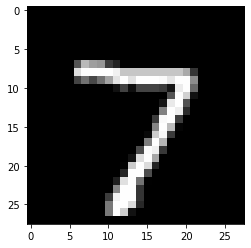

In [43]:
show_result(x_test[0], y_test[0])

## Создание модели ##
Будем использовать не сложную архитектуру последовательности Sequential

In [35]:
# архитектура включает в себя сверточные слои с понижением размерности через раз
# далее идет векторизация для полносвязнах слоев
# и конечным результатом идет распределение верятностей по классам через активацию softmax
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = class_num, activation = 'softmax'))

# для функцияи loss используется scc так как классов больше чем 2
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 32)               

## Обучение модели ##

In [68]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 8)

Epoch 1/8
469/469 [==============================] - 100s 213ms/step - loss: 0.0447 - accuracy: 0.9865
Epoch 2/8
469/469 [==============================] - 97s 206ms/step - loss: 0.0376 - accuracy: 0.9885
Epoch 3/8
469/469 [==============================] - 86s 184ms/step - loss: 0.0309 - accuracy: 0.9908
Epoch 4/8
469/469 [==============================] - 86s 183ms/step - loss: 0.0273 - accuracy: 0.9916
Epoch 5/8
469/469 [==============================] - 91s 194ms/step - loss: 0.0241 - accuracy: 0.9921
Epoch 6/8
469/469 [==============================] - 84s 178ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 7/8
469/469 [==============================] - 73s 157ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 8/8
469/469 [==============================] - 71s 152ms/step - loss: 0.0162 - accuracy: 0.9950


In [69]:
# fit_history содержит записи метрик после каждой эпохи
fit_history = pd.DataFrame(history.history)

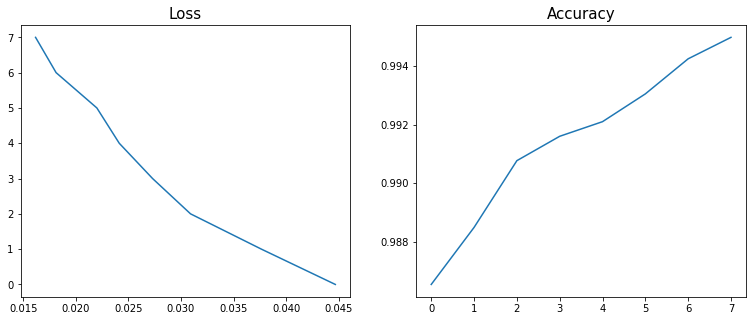

In [70]:
fig, axis = plt.subplots(1, 2, figsize = (13, 5))
axis[0].plot(fit_history['loss'], fit_history.index)
axis[0].set_title('Loss', fontsize = 15)
axis[1].set_title('Accuracy', fontsize = 15)
axis[1].plot(fit_history['accuracy'])
plt.show()

## Инференс ##

In [ ]:
# Сохраняем модель
model.save('num_classifical_model')

In [72]:
# Выгружаем модель
my_save_model = tf.keras.models.load_model('/content/num_classifical_model')

1/1 [==============================] - 0s 82ms/step
Предсказанный класс: 7
Истинный класс: 7


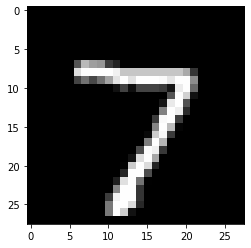

In [90]:
# производим инференс сохраненной модели
show_result(x_test[0], y_test[0], predict = True, model = my_save_model)